In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import astropy.table
from astropy.coordinates import SkyCoord
from astropy import units as u

from wuvars.data import spreadsheet, photometry
from wuvars.plotting.lightcurve import simple_lc





In [3]:
spread = spreadsheet.load_v1()
phot_grouped = photometry.load_v2_grouped()

Loading WSERV5 photometry data... DONE (elapsed time: 0.27s)
Loading WSERV7 photometry data... DONE (elapsed time: 0.43s)
Loading WSERV8 photometry data... DONE (elapsed time: 0.23s)
Loading WSERV11 photometry data... DONE (elapsed time: 0.82s)
Grouping WSERV5 photometry data... DONE (elapsed time: 4.20s)
Grouping WSERV7 photometry data... DONE (elapsed time: 3.32s)
Grouping WSERV8 photometry data... DONE (elapsed time: 2.19s)
Grouping WSERV11 photometry data... DONE (elapsed time: 4.25s)


In [9]:
# load up the Scholz table.

# it lives...
aux_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/NGC1333"
filepath = os.path.join(aux_path, "Scholz_2012ApJ_744_6S_table4.fit")

# load up our data.
table = astropy.table.Table.read(filepath)

# Do some catalog matching.
# (possibly: see https://docs.astropy.org/en/stable/coordinates/matchsep.html)

table_coordinates = SkyCoord(ra=table['RAJ2000'], dec=table['DEJ2000'])

In [10]:
w7m = spread.wserv7['mean']
spreadsheet_coordinates = SkyCoord(ra=w7m['RA'].values*u.rad, dec=w7m['DEC'].values*u.rad)
idx, d2d, d3d = table_coordinates.match_to_catalog_sky(spreadsheet_coordinates)

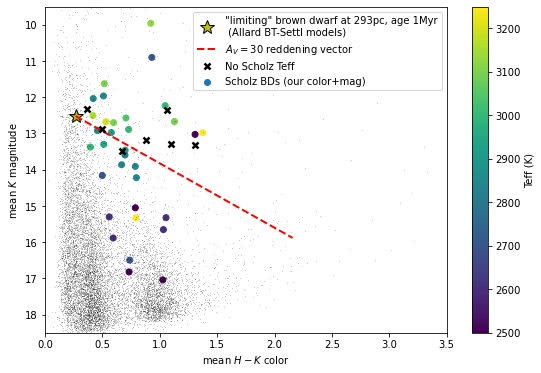

In [12]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

fig, ax = plt.subplots(1, figsize=(9,6))

# rieke & lebofsky 1985 reddening law
A_K = 0.112
A_H = 0.175
E_HK = A_H - A_K # this is like a slope in color-mag space

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k

q0 = sq0(spread.wserv7, 80, 160)

ax.plot(
    [H_BDlimit-K_BDlimit],
    [K_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

ax.plot(
    [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*30],
    [K_BDlimit, K_BDlimit + A_K*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
ax.plot(hmk[q0], k[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 3.5)
ax.set_ylim(18.5, 9.5)

us_J = w7m['JAPERMAG3'].values[idx]
us_H = w7m['HAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]

teff = np.copy(table['Teff1']) * 1.0
teff[teff == 0] = np.nan

sc = ax.scatter(us_H-us_K, us_K, c=teff, label="Scholz BDs (our color+mag)")
ax.plot((us_H-us_K)[np.isnan(teff)], us_K[np.isnan(teff)], 'kx', mew=2.5, label='No Scholz Teff')
cbar = plt.colorbar(sc)
cbar.set_label('Teff (K)')

ax.set_xlabel("mean $H-K$ color")
ax.set_ylabel("mean $K$ magnitude")
plt.legend()

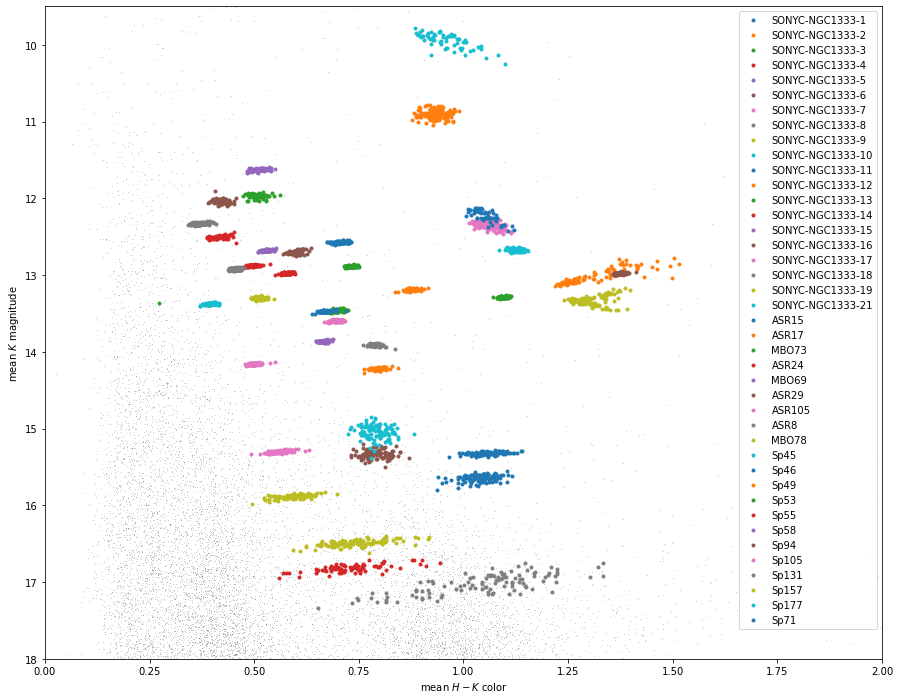

In [26]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

fig, ax = plt.subplots(1, figsize=(15,12))

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k

q0 = sq0(spread.wserv7, 80, 160)

ax.plot(hmk[q0], k[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 2)
ax.set_ylim(18, 9.5)

us_J = w7m['JAPERMAG3'].values[idx]
us_H = w7m['HAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]

teff = np.copy(table['Teff1']) * 1.0
teff[teff == 0] = np.nan

# sc = ax.scatter(us_H-us_K, us_K, c=teff, label="Scholz BDs (our color+mag)")
# ax.plot((us_H-us_K)[np.isnan(teff)], us_K[np.isnan(teff)], 'kx', mew=2.5, label='No Scholz Teff')
# cbar = plt.colorbar(sc)
# cbar.set_label('Teff (K)')

ax.set_xlabel("mean $H-K$ color")
ax.set_ylabel("mean $K$ magnitude")
# plt.legend()

dg = phot_grouped.wserv7

bd_match_sids = w7m.index[idx]

for i, sid in enumerate(bd_match_sids):
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == sid]
    
    plt.plot(dat['HAPERMAG3'] - dat['KAPERMAG3'], dat['KAPERMAG3'], '.', label=str(table['ID'][i]))
    
    
plt.legend()

plt.savefig("first_draft_41BD_cloud_atlas.png", bbox_inches='tight')

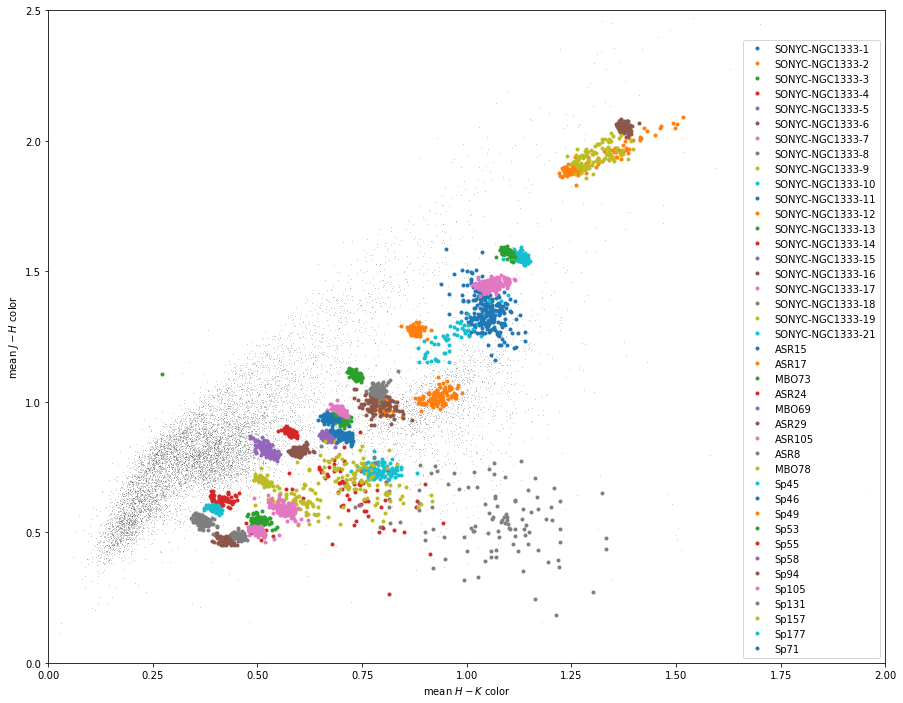

In [27]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

fig, ax = plt.subplots(1, figsize=(15,12))

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

j = w7m['JAPERMAG3']
h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k
jmh = j-h

q0 = sq0(spread.wserv7, 80, 160)

ax.plot(hmk[q0], jmh[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 2)
ax.set_ylim(0, 2.5)

us_J = w7m['JAPERMAG3'].values[idx]
us_H = w7m['HAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]

# teff = np.copy(table['Teff1']) * 1.0
# teff[teff == 0] = np.nan

# sc = ax.scatter(us_H-us_K, us_K, c=teff, label="Scholz BDs (our color+mag)")
# ax.plot((us_H-us_K)[np.isnan(teff)], us_K[np.isnan(teff)], 'kx', mew=2.5, label='No Scholz Teff')
# cbar = plt.colorbar(sc)
# cbar.set_label('Teff (K)')

ax.set_xlabel("mean $H-K$ color")
ax.set_ylabel("mean $J-H$ color")
# plt.legend()

dg = phot_grouped.wserv7

bd_match_sids = w7m.index[idx]

for i, sid in enumerate(bd_match_sids):
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == sid]
    
    plt.plot(dat['HAPERMAG3'] - dat['KAPERMAG3'], dat['JAPERMAG3'] - dat['HAPERMAG3'], '.', label=str(table['ID'][i]))
    
    
plt.legend()

plt.savefig("first_draft_41BD_cloud_atlas_colorcolor.png", bbox_inches='tight')